# Исследование надежности заемщиков

<font color='Blue' size=+2><b>Цель исследования:</b></font><br>
<font color='Blue'><b>**Заказчиком данной работы является кредитный отдел банка. Поставлена задача определения доли неблагонадежных должников в зависимости от их принадлежности к различным группам. Изучаются зависимости применительно к таким группам как: семейное положение, количество детей в семье, уровень дохода и цели получения кредита. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.**</b></font>

<font color='Blue'><b>**Откроем таблицу и изучим предоставленную информацю. Предварительно загрузим необходимые для исследования библиотеки.**</b></font>

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<font color='Blue'><b>**Вывод:**  
  
  **Открыта таблица с предоставленными данными. Для дальнейшей обработки данных необходимо будет удалить дупликаты и заполнить пропуски.**</b></font>

## Предобработка данных

<font color='Blue'><b>**Проведем предобработку полученных данных. Предварительно оценим количество пропущенных значений.**</b></font>

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<font color='Blue'><b>**В двух столбцах "days_employed" (трудовой стаж) и "total_income" (среднемесячные доходы) присутствуют пропуски. Пропуски в столбце "total_income" заполним медианным доходом среди всех записей с тем же типом.** </b></font> 

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

<font color='Blue'><b> **В полученных данных трудовой стаж в некоторых позициях представлен в отрицательных числах. Необходимо их все привести к положительным значениям.** </b></font>

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

<font color='Blue'><b> **Пропуски в столбце "days_employed" заполним медианным значение трудового стажа для каждого типа занятости.** </b></font>

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

<font color='Blue'><b> **Проведем анализ столбца "children" (числа детей в семье клиентов). Проанализируем таблицу на наличие аномальных значений в этом столбце. Удалим при наличии такие строчки.** </b></font>

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

<font color='Blue'><b> **Ранее бы наблюдали наличие пропусков в столбце "days_employed" (трудовой стаж в днях). Заполним эти пропуски медианными значениями по каждого типа занятости "income_type".** </b></font>

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

<font color='Blue'><b> **Пропуски таблицы нами заполнены. Теперь приведем данные столбца "total_income" (среднемесячного дохода) к целочисленным значениям.** </b></font>

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

<font color='Blue'><b> **В столбце "education" (уровень образования) приведем записанные значения к единому виду к строчным буквам.** </b></font>

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

<font color='Blue'><b> **Проанализируем данные на наличие дубликатов и удалим дублирующие.** </b></font>

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

<font color='Blue'><b> **Сгруппируем клиентов по группам в зависимости от уровня доходов и создадим для этого функцию распределяющих клиентов в соответствующию группу в зависимости от уровня дохода.** </b></font>

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

<font color='Blue'><b> **Сгруппируем клиентов по группам в зависимости от цели кредитов. Анализ полученных данных в столбце целей кредитов показал, что их всех можно распределить на 4 основные группы ("операции с автомобилем", "операции с недвижимостью", "проведение свадьбы", "получение образования"). Cоздадим для этого соответствующую функцию.** </b></font>

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

<font color='Blue'><b> **Исследуем зависимость количества детей в семьях клиентов и возврата кредитов в срок.** </b></font>

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

1. Добавляем нужную библиотеку

In [22]:
import seaborn as sns
import matplotlib.pylab as plt

2. Изобразим гистограмму в Seaborn вызвав функцию barplot(). Построим зависимость задолженности по возврату кредитов от количества детей. Seaborn автоматически применяет фильтр к параметру задолженности ("0" или "1"), который основан на вычислении среднего значения предоставленных данных. Соотношение числа клиентов имевших задолженность к общему количеству клиентов выразим в процентах, %.

<AxesSubplot:xlabel='children', ylabel='debt'>

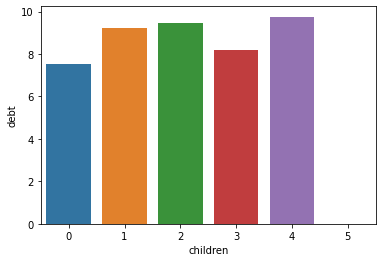

In [23]:
sns.barplot(x = data['children'], y=data['debt']*100, ci=None)

In [24]:
temp = data.copy()

def percent(x):
    return "{0:.2%}".format(x)

def que(category):
    data_temp = temp.pivot_table(index=category, values='debt', aggfunc=['count', 'sum', 'mean'])
    data_temp.columns = ['Всего заемщиков', 'Всего должников', 'Доля должников']
    
    display(data_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))
    
que('children')

,Всего заемщиков,Всего должников,Доля должников
children,,,
0,14091.000,1063.000,0.075
1,4808.000,444.000,0.092
2,2052.000,194.000,0.095
3,330.000,27.000,0.082
4,41.000,4.000,0.098
5,9.000,0.000,0.000


<font color='Blue'><b> Выводы:  
    •	cамые надежные заемщики с долей 0.075 - это заемщики без детей;     
    • 	с увеличением количества детей доля просрочек увеличивается и многодетные семьи с 4-мя детьми относятся к ненадежным заемщикам с самой высокой долей просрочек 0.097    
    •	подмечено, что доля должников с многодетные семьи с 5-мя детьми равно 0%. Это по причине их малого количествап среди кредитополучателей. А среди должников их количество равно "0". </b></font>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

<font color='Blue'><b> **Исследуем зависимость между семейным положением и возвратом кредита в срок.** </b></font>

In [25]:
que('family_status')

,Всего заемщиков,Всего должников,Доля должников
family_status,,,
Не женат / не замужем,2796.000,273.000,0.098
в разводе,1189.000,84.000,0.071
вдовец / вдова,951.000,63.000,0.066
гражданский брак,4134.000,385.000,0.093
женат / замужем,12261.000,927.000,0.076


<font color='Blue'><b> **Выводы:    
    •	одинокие заемщики без семьи (family_status = "Не женат/не замужем") имеют наибольшую долю просрочек по кредиту 0.098;   
    •   следом идут заемщики находящиеся в гражданском браке с долей просрочек по кредиту 0.093;  
    •	наименьшая доля просрочек 0.066 по кредиту выявлена у овдовевших супругов (family_status = "вдовец / вдова").** </b></font>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<font color='Blue'><b> **Исследуем зависимость между уровнем дохода и возвратом кредита в срок.** </b></font>

In [26]:
que('total_income_category')

,Всего заемщиков,Всего должников,Доля должников
total_income_category,,,
A,25.000,2.000,0.080
B,5014.000,354.000,0.071
C,15921.000,1353.000,0.085
D,349.000,21.000,0.060
E,22.000,2.000,0.091


<font color='Blue'><b> Выводы:    
    Данные представленные выборки несбалансированные и мы группировали их ранее по диапазонам в 4 категории. Используя метод .qcut проведем детальный анализ используя цикл. Данный метод делит группы на равные по количеству заемщиков в каждой. Будем делить категории на части от 3 до 10. Постарамся сузив диапазон исследования, уточнить диапазон доходов самых неблагонадежных клиентов.
 </b></font>

In [27]:
temp = data.copy()
start, stop = 3, 10
while start <= stop:
    temp['new_category'] = pd.qcut(temp['total_income'], q=start, precision=0)
    que('new_category')
    start += 1

,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 119218.0]",7111.000,580.000,0.082
"(119218.0, 172357.0]",7238.000,627.000,0.087
"(172357.0, 2265604.0]",6982.000,525.000,0.075


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 107507.0]",5333.000,427.000,0.080
"(107507.0, 142594.0]",5450.000,480.000,0.088
"(142594.0, 195842.0]",5216.000,444.000,0.085
"(195842.0, 2265604.0]",5332.000,381.000,0.071


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 98514.0]",4267.000,344.000,0.081
"(98514.0, 132113.0]",4266.000,358.000,0.084
"(132113.0, 161380.0]",4266.000,373.000,0.087
"(161380.0, 214604.0]",4266.000,358.000,0.084
"(214604.0, 2265604.0]",4266.000,299.000,0.070


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 92092.0]",3556.000,285.000,0.080
"(92092.0, 119218.0]",3555.000,295.000,0.083
"(119218.0, 142594.0]",3672.000,327.000,0.089
"(142594.0, 172357.0]",3566.000,300.000,0.084
"(172357.0, 228893.0]",3427.000,276.000,0.081
"(228893.0, 2265604.0]",3555.000,249.000,0.070


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 87287.0]",3048.000,233.000,0.076
"(87287.0, 113563.0]",3047.000,262.000,0.086
"(113563.0, 137465.0]",3047.000,263.000,0.086
"(137465.0, 155314.0]",3047.000,264.000,0.087
"(155314.0, 184554.0]",3047.000,257.000,0.084
"(184554.0, 242009.0]",3047.000,242.000,0.079
"(242009.0, 2265604.0]",3048.000,211.000,0.069


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 83837.0]",2667.000,206.000,0.077
"(83837.0, 107507.0]",2666.000,221.000,0.083
"(107507.0, 127546.0]",2666.000,233.000,0.087
"(127546.0, 142594.0]",2784.000,247.000,0.089
"(142594.0, 166525.0]",2549.000,223.000,0.087
"(166525.0, 195842.0]",2667.000,221.000,0.083
"(195842.0, 254250.0]",2665.000,196.000,0.074
"(254250.0, 2265604.0]",2667.000,185.000,0.069


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 80986.0]",2371.000,181.000,0.076
"(80986.0, 102464.0]",2370.000,194.000,0.082
"(102464.0, 119218.0]",2370.000,205.000,0.086
"(119218.0, 140476.0]",2370.000,203.000,0.086
"(140476.0, 151615.0]",2370.000,217.000,0.092
"(151615.0, 172357.0]",2498.000,207.000,0.083
"(172357.0, 204607.0]",2241.000,195.000,0.087
"(204607.0, 261859.0]",2371.000,166.000,0.070
"(261859.0, 2265604.0]",2370.000,164.000,0.069


,Всего заемщиков,Всего должников,Доля должников
new_category,,,
"(20666.0, 78710.0]",2134.000,157.000,0.074
"(78710.0, 98514.0]",2133.000,187.000,0.088
"(98514.0, 115973.0]",2133.000,178.000,0.083
"(115973.0, 132113.0]",2133.000,180.000,0.084
"(132113.0, 142594.0]",2250.000,205.000,0.091
"(142594.0, 161380.0]",2016.000,168.000,0.083
"(161380.0, 179844.0]",2133.000,179.000,0.084
"(179844.0, 214604.0]",2133.000,179.000,0.084
"(214604.0, 269801.0]",2133.000,148.000,0.069


<font color='Blue'><b> Выводы:    
    •	разделив наш диапазон на 10 частей с равным количеством заемщиков, мы обнаружили, что кредиторы с доходом от 132 т.р. до 142 т.р. являются группой с самым высокой долей задержек по выплатам за кредит;   
    •   а заемщики с самым низким доходом (менее 83 т.р.) и с самы высоким (более 195 т.р.) имеют минимальную долю задержек;   
    •   при этом подмечено, что с увеличением уровня доходов заемщиков, уменьшается среди них доля не надежных клиентов банка;  
    •   при этом также подмечено, что с уменьшением уровня доходов заемщиков, уменьшается среди них также доля не надежных клиентов банка;  
    •   таким образом выяснилось, что самые бедные и самые богатые заемщики являются самыми надежными.
    </b></font>
 </b></font>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<font color='Blue'><b> **Исследуем зависимость между разными целями взятия кредита и его возвратом в срок.** </b></font>

In [28]:
que('purpose_category')

,Всего заемщиков,Всего должников,Доля должников
purpose_category,,,
операции с автомобилем,4279.000,400.000,0.093
операции с недвижимостью,10751.000,780.000,0.073
получение образования,3988.000,369.000,0.093
проведение свадьбы,2313.000,183.000,0.079


<font color='Blue'><b> Выводы:    
    •	кредиты выданные на покупку автомобиля относятся к самым ненадежным и имеют долю просрочек по кредиту 0.093;   
    •   далее к ненадежным заемщикам относятся те, кто берут кредиты на образование с долей просрочки 0.093;   
    •   следом по росту надежности следуют заемщики, которые берут кредиты на проведение свадьбы с долей просрочки 0.79;  
    •	наконец, самые надежные кредиты выданные на покупку недвижимости с долей просрочки 0.073. </b></font>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

<font color='Blue'><b>Выводы:    
При оформлении кредита, клиенты заполняя заявку, могут некоторые данные о себе не корректно и не разборчиво вводить. А основная масса пропусков связана с пунктом общего трудового стажа в днях (days_employed). Очень сложно и в годах вспомнить и посчитать трудовой стаж. И поэтому в основной массе клиенты не заполняют эти данные. И также значительно превалируют пропуски в графе ежемесячного дохода (total_income).       
    Существует несколько причин отсутствия данных в датасетах, в том числе:     
    - Человеческий фактор: Ошибки ввода данных, не желание отвечать на определенные вопросы.     
    - Технические проблемы: Возможны сбои с оборудованием или программным обеспечением для сбора данных. Отсутствующие данные могут быть удалены в процессе обработки или очистки данных.      
    - Организационные: Конфиденциальность, могут отсутствовать данные, идентифицирующие отдельных лиц или компании.   
    Рекомендуется внимательней относиться сотрудникам банка для минимизирования появления прорпусков в получаемых данных.
    </b></font>

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

<font color='Blue'><b> Выводы:    
Медианное значение более эффективно, так как не искажено так сильно из-за небольшой доли чрезвычайно больших или маленьких значений. Поэтому медианное значение может дать лучшее представление о «типичном» значении, как и при возможном наличии пропусков. По этому, среднее значение может быть не совсем объективным при отражении данных. Посчитаем и сравним среднюю и медиану для колонки "days_employed" (трудовой стаж).</b></font>

In [29]:
print('Среднее значение трудового стажа:', data['days_employed'].median().round())
print('Медианное значение трудового стажа:', data['days_employed'].mean().round())

Среднее значение трудового стажа: 1997.0
Медианное значение трудового стажа: 67149.0


<font color='Blue'><b> Выводы:    
Среднее значение значительно ниже медианного. Это вследствии преобладания количества клиентов с минимальным уровнем дохода. Поэтому для нашего исследования медианное значение более достоверно и целесообразно к использованию.</b></font>

### Шаг 4: общий вывод.

<font color='Blue'><b>**В данной работе решалась задача определения доли неблагонадежных должников в зависимости от их принадлежности к различным группам. Изучались зависимости применительно к таким группам как: семейное положение, количество детей в семье, уровень дохода и цели получения кредита. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.**</b></font>

  
<font color='Blue' size=+1><b>
    Описание переменных: </b></font></b>  
children — количество детей в семье  
days_employed — общий трудовой стаж в днях  
dob_years — возраст клиента в годах  
education — уровень образования клиента  
education_id — идентификатор уровня образования  
family_status — семейное положение  
family_status_id — идентификатор семейного положения  
gender — пол клиента  
income_type — тип занятости  
debt — имел ли задолженность по возврату кредитов  
total_income — ежемесячный доход  
purpose — цель получения кредита  

 <font color='Blue' size=+1><b>
    Были последовательны применены данные методы в работе:</b></font></b>   
открыт файл;  
файл изучен;  
определены пропущенные значения;  
заполнены пропущенные значения;  
есть пояснение какие пропущенные значения обнаружены;  
описаны возможные причины появления пропусков в данных;  
объяснено по какому принципу заполнены пропуски;  
заменен вещественный тип данных на целочисленный;  
есть пояснение какой метод используется для изменения типа данных и почему;  
удалены дубликаты;  
есть пояснение какой метод используется для поиска и удаления дубликатов;  
описаны возможные причины появления дубликатов в данных;  
выделены леммы в значениях столбца с целями получения кредита;  
описан процесс лемматизации;  
данные категоризированы.



<font color='Blue' size=+2><b>Общий вывод:</b></font><br>  

Основная масса пропусков связана с пунктом общего трудового стажа в днях (days_employed) и уровнем ежемесячного дохода (total_income). Рекомендуется внимательней относиться сотрудникам банка к полному заполнению данных для минимизирования появления прорпусков.

 <font color='Blue' size=+1><b>    
    Исследование зависимости между количеством детей и возвратом кредита в срок показало:</b></font></b>  
•	cамые ненадежные заемщики с самой высокой долей просрочек 9,76% - это многодетные семьи с 4-мя детьми;   
•	самые надежные заемщики с самой низкой долей просрочек по кредиту 7,54% - это заемщики без детей.      
<font color='Blue' size=+1><b>
    Исследование зависимости между семейным положением и возвратом кредита в срок показало:</b></font></b>  
•	одинокие заемщики без семьи имеют наибольшую долю просрочек по кредиту 9,76%.   
•	наименьшая доля просрочек 6,62% по кредиту выявлена у овдовевших супругов.      
<font color='Blue' size=+1><b>
    Исследование зависимости между уровнем дохода и возвратом кредита в срок показало:</b></font></b>  
    •	разделив наш диапазон на 10 частей с равным количеством заемщиков, мы обнаружили, что кредиторы с доходом от 132 т.р. до 142 т.р. являются с самым высокой долей 9,1% задержек выплатам за кредит;   
    •   а заемщики с самым низким доходом (менее 83 т.р.) и с самы высоким (более 195 т.р.) имеют минимальную долю задержек около 7%;   
    •   при этом подмечено, что с увеличением уровня доходов заемщиков, уменьшается среди них доля не надежных клиентов банка;  
    •   при этом также подмечено, что с уменьшением уровня доходов заемщиков, уменьшается среди них также доля не надежных клиентов банка;  
    •   таким образом выяснилось, что самые бедные и самые богатые заемщики являются самыми надежными.      
<font color='Blue' size=+1><b>
    Исследование зависимости между целями кредита и возвратом кредита в срок показало:</b></font></b>  
•	самые ненадежные заемщики те, кто берут кредиты на покупку автомобиля (доля просрочки 9,34%) и на образование (9,25%);   
•	далее по росту надежности следуют заемщики, которые берут кредиты на проведение свадьбы с долей просрочек 7,91%;    
•	самые надежные заемщики - те, кто берут кредиты на операции с недвижимостью с долей просрочек 7,25%.      
<font color='Blue' size=+1><b>Идеальные заемщики для банка при рассмотрении заявки на кредиты - это:</b></font></b>  
•	желающие взять ипотечный кредит (не автокредит, не кредит на образование и не на свадьбы);    
•	семейные люди без детей или вдовец/вдова;   
•	с уровнем дохода менее 50 т.р. и с доходом более 200 т.р.</b></font>